##### 子母畫面影片
這篇教學會如何使用 OpenCV 讀取兩個不同來源的影片 ( 例如兩個攝影機 )，將兩個影片組合成一個「子母畫面」的影片。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 讀取兩個不同來源的影片 
延伸「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」文章範例，加入第二個影片來源，就可以用不同的視窗，顯示不同的影片。

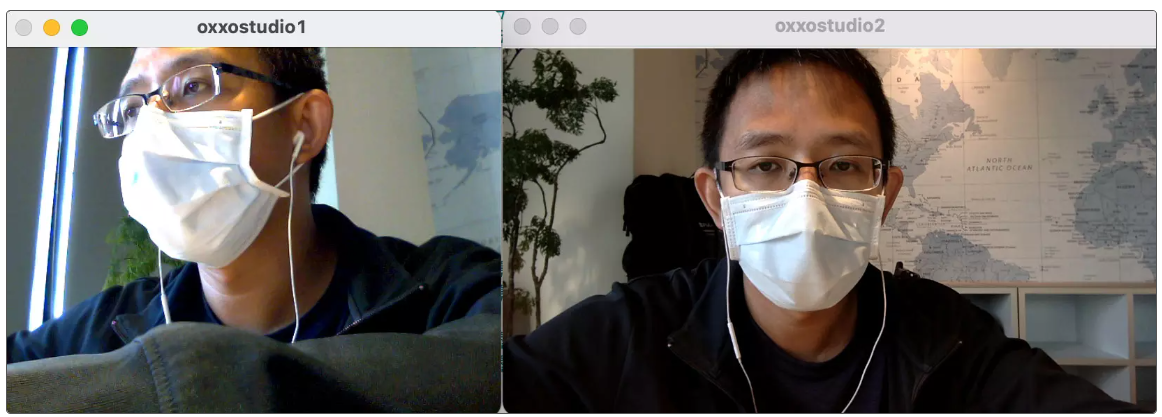

In [ ]:
import cv2
cap1 = cv2.VideoCapture('1080_1920_30fps.mp4')           # 讀取第一個影片來源
cap2 = cv2.VideoCapture('4096_2160_24fps.mp4')           # 讀取第二個影片來源

if not cap1.isOpened():
    print("Cannot open camera1")
    exit()
if not cap2.isOpened():
    print("Cannot open camera2")
    exit()

while True:
    ret1, img1 = cap1.read()         # 讀取第一個來源影片的每一幀
    ret2, img2 = cap2.read()         # 讀取第一個來源影片的每一幀

    cv2.imshow('oxxostudio1', img1)  # 如果讀取成功，顯示該幀的畫面
    cv2.imshow('oxxostudio2', img2)  # 如果讀取成功，顯示該幀的畫面
    if cv2.waitKey(1) == ord('q'):
        break
cap1.release()
cap2.release()
cv2.destroyAllWindows()

##### 將兩部影片合成為子母畫面 
使用「[剪裁影像](https://steam.oxxostudio.tw/category/python/ai/opencv-crop.html)」的方法，就能將第一個來源的影像，合併到第二個來源影像中的特定位置，\
搭配「[rectangle() 畫四邊形](https://steam.oxxostudio.tw/category/python/ai/opencv-drawing.html#a3)」，替合成的畫面繪製白色外框，最後就成為不錯的子母畫面影片。

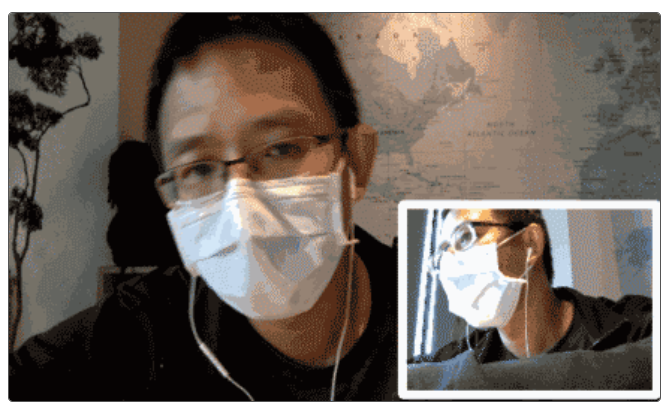

In [ ]:
import cv2
cap1 = cv2.VideoCapture('1080_1920_30fps.mp4')           # 讀取第一個影片來源
cap2 = cv2.VideoCapture('4096_2160_24fps.mp4')           # 讀取第二個影片來源

if not cap1.isOpened():
    print("Cannot open camera1")
    exit()
if not cap2.isOpened():
    print("Cannot open camera2")
    exit()

while True:
    ret1, img1 = cap1.read()
    ret2, img2 = cap2.read()
    img1 = cv2.resize(img1,(200,150))  # 縮小尺寸
    img2 = cv2.resize(img2,(540,320))  # 縮小尺寸
    img2[160:310,330:530] = img1       # 將 img2 的特定區域換成 img1

    cv2.rectangle(img2, (330,160), (530,310), (255,255,255), 3)  # 繪製子影片的外框

    cv2.imshow('oxxostudio', img2)
    if cv2.waitKey(1) == ord('q'):
        break
cap1.release()
cap2.release()
cv2.destroyAllWindows()